In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns

In [2]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
2915,2916,8531.2,587.8,4613.3,1699.0,447.2,9638.3,4049.6,807.5,271888.9766,...,2.403,2.419,2.376,2.041,2.491,2.133,2.472,2.396,2.36172,49
1044,1045,5502.8,2257.5,3504.2,1216.6,739.0,5213.4,4321.3,390.6,197384.5949,...,2.308,2.377,2.310,1.824,2.170,2.251,2.516,2.348,2.30058,75
515,516,6052.2,1270.1,3134.3,1079.6,730.1,5978.4,3925.5,285.5,201231.3318,...,2.335,2.538,2.397,1.851,2.308,2.046,2.570,2.301,2.25266,81
2974,2975,5144.1,2266.0,3411.5,1089.1,1221.7,4670.0,3844.9,337.8,208419.6029,...,2.241,2.457,2.356,1.881,2.535,2.255,2.400,2.345,2.28944,81
3766,3767,9256.6,1412.8,4904.1,1943.1,328.2,8414.8,5957.0,546.1,244166.5716,...,2.651,2.744,2.562,2.185,2.611,2.313,2.703,2.610,2.57874,48


In [3]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['Age'])
y = inputData['Age']


In [4]:
# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
from sklearn import linear_model
myLassoReg = linear_model.Lasso(alpha=0.1)
myLassoReg.fit(X_train,y_train)


Lasso(alpha=0.1)

In [6]:
# check the model's performance on unseen, test data
predictions = myLassoReg.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


r square value: 0.7659145850392234
mean absolute error (years): 7.652143164230631
mean square error: 92.42915934349519
root mean absolute error (years): 9.614008495081288


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

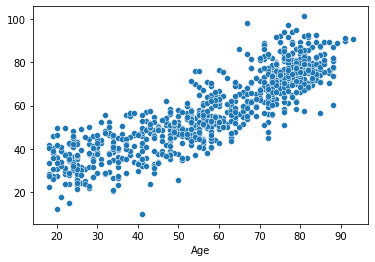

In [7]:
sns.scatterplot(y_test, predictions)